In [15]:
import pandas as pd
import numpy as np

s = '/Users/morganwaddington/Documents/Tandon/Classes/Machine-Learning/kddcup.data_10_percent_corrected'
df = pd.read_csv(s, header=None, encoding='utf-8')

df = df.sample(frac=0.2, random_state=1) 

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in [1, 2, 3]:
    df.iloc[:, col] = label_encoder.fit_transform(df.iloc[:, col])


In [17]:

print(df.iloc[0, 41])

y = df.iloc[:, 41].values 

y = np.where(np.isin(y, ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.']), 0, 1) 

X = df.iloc[:, 0:41].values #41 is correct


smurf.


In [18]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)



In [19]:


print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))



Labels counts in y: [78346 20458]
Labels counts in y_train: [62677 16366]
Labels counts in y_test: [15669  4092]


In [20]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [21]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                             resolution=0.02):
       # setup marker generator and color map
       markers = ('s', 'x', 'o', '^', 'v')
       colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
       cmap = ListedColormap(colors[:len(np.unique(y))])
       # plot the decision surface
       x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
       x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
       xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                              np.arange(x2_min, x2_max, resolution))
       Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
       Z = Z.reshape(xx1.shape)
       plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
       plt.xlim(xx1.min(), xx1.max())
       plt.ylim(xx2.min(), xx2.max())
       for idx, cl in enumerate(np.unique(y)):
           plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=colors[idx],
                       marker=markers[idx], label=cl,
                       edgecolor='black')

        # highlight test examples
       if test_idx:
           # plot all examples
           X_test, y_test = X[test_idx, :], y[test_idx]
           plt.scatter(X_test[:, 0], X_test[:, 1],
                       c='', edgecolor='black', alpha=1.0,
                       linewidth=1, marker='o',
                       s=100, label='test set')

In [22]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


In [23]:

from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=1.0, random_state=1)
svm_linear.fit(X_train_std, y_train)

rbf = SVC(kernel='rbf', C=1.0, gamma=0.1, random_state=1)
rbf.fit(X_train_std, y_train)

sigmoid = SVC(kernel='sigmoid', C=1.0, gamma=0.1, random_state=1)
sigmoid.fit(X_train_std, y_train)

poly = SVC(kernel='poly', C=1.0, gamma=0.1, random_state=1)
poly.fit(X_train_std, y_train)



# plot_decision_regions(X_combined_std,
#                       y_combined,
#                       classifier=svm,
#                       test_idx=X_test_std)

# plt.xlabel('petal length [standardized]')
# plt.ylabel('petal width [standardized]')
# plt.legend(loc='upper left')
# plt.tight_layout()
# plt.show()




# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs')
# lr.fit(X_train_std, y_train);


# print(f"Converged in {lr.n_iter_[0]} iterations.")

SVC(gamma=0.1, kernel='poly', random_state=1)

Although I'm not an expert, it appears that the model converging in 61 iterations is quite standard and nothing unusual. This number of iterations may indicate some moderate complexity in the data, which isn't surprising given the extensive nature of the dataset. Ultimately, the model successfully converges and exhibits high accuracy, so this outcome seems well within normal expectations.

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import display, HTML


def print_results(y_train_pred, y_test_pred):
    cm = confusion_matrix(y_train, y_train_pred)
    display(HTML(f"<h2>How did the training go:</h2>"))
    print('Confusion Matrix:')
    print(cm)
    
    print()
    
    report = classification_report(y_train, y_train_pred)
    print('Classification Report:')
    print(report)
    
    
    cm = confusion_matrix(y_test, y_test_pred)
    print()
    display(HTML(f"<h2>How did the testing go:</h2>"))
    print('Confusion Matrix:')
    print(cm)
    
    print()
    
    report = classification_report(y_test, y_test_pred)
    print('Classification Report:')
    print(report)

y_train_pred = svm_linear.predict(X_train_std)
y_test_pred = svm_linear.predict(X_test_std)

print_results(y_train_pred, y_test_pred)

y_train_pred = rbf.predict(X_train_std)
y_test_pred = rbf.predict(X_test_std)

print_results(y_train_pred, y_test_pred)

y_train_pred = sigmoid.predict(X_train_std)
y_test_pred = sigmoid.predict(X_test_std)

print_results(y_train_pred, y_test_pred)

y_train_pred = poly.predict(X_train_std)
y_test_pred = poly.predict(X_test_std)

print_results(y_train_pred, y_test_pred)


Confusion Matrix:
[[62662    15]
 [    8 16358]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62677
           1       1.00      1.00      1.00     16366

    accuracy                           1.00     79043
   macro avg       1.00      1.00      1.00     79043
weighted avg       1.00      1.00      1.00     79043




Confusion Matrix:
[[15667     2]
 [    5  4087]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15669
           1       1.00      1.00      1.00      4092

    accuracy                           1.00     19761
   macro avg       1.00      1.00      1.00     19761
weighted avg       1.00      1.00      1.00     19761



Confusion Matrix:
[[62672     5]
 [    6 16360]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62677
           1       1.00      1.00      1.00     16366

    accuracy                           1.00     79043
   macro avg       1.00      1.00      1.00     79043
weighted avg       1.00      1.00      1.00     79043




Confusion Matrix:
[[15666     3]
 [    1  4091]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15669
           1       1.00      1.00      1.00      4092

    accuracy                           1.00     19761
   macro avg       1.00      1.00      1.00     19761
weighted avg       1.00      1.00      1.00     19761



Confusion Matrix:
[[61380  1297]
 [ 1265 15101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     62677
           1       0.92      0.92      0.92     16366

    accuracy                           0.97     79043
   macro avg       0.95      0.95      0.95     79043
weighted avg       0.97      0.97      0.97     79043




Confusion Matrix:
[[15405   264]
 [  341  3751]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     15669
           1       0.93      0.92      0.93      4092

    accuracy                           0.97     19761
   macro avg       0.96      0.95      0.95     19761
weighted avg       0.97      0.97      0.97     19761



Confusion Matrix:
[[62674     3]
 [    7 16359]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62677
           1       1.00      1.00      1.00     16366

    accuracy                           1.00     79043
   macro avg       1.00      1.00      1.00     79043
weighted avg       1.00      1.00      1.00     79043




Confusion Matrix:
[[15666     3]
 [    2  4090]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15669
           1       1.00      1.00      1.00      4092

    accuracy                           1.00     19761
   macro avg       1.00      1.00      1.00     19761
weighted avg       1.00      1.00      1.00     19761



The similar results between the training and testing classification reports indicate that the model is not overfitting. If overfitting were occurring, we would likely see a drop in test performance compared to training, particularly in accuracy. However, that's not the case here. Likewise, there are no significant drops in other performance metrics, such as precision, recall, and F1-score. Since the model performs well on unseen data (i.e., the test set), this suggests that it has learned the correct patterns and is able to generalize effectively. Overall, this indicates that logistic regression is a suitable model for this task and is well-calibrated for the problem at hand.

However, I believe it is important to point out that the dataset we are working with is highly imbalanced. There are only 4,107 probe-style attacks out of 494,021 total instances, representing just 0.008313% of the data. This extreme imbalance underscores the importance of focusing on the recall metric. While accuracy is 100% and precision reaches 99%, recall drops to the high 80s, indicating that the model fails to correctly identify more than 10% of probe attacks. Although this isn't a catastrophic drop, it does highlight that the model still struggles to classify all probe attacks.

In [13]:
coefficients = svm_linear.coef_[0]

feature_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'
]

coef_df = pd.DataFrame({'Feature': feature_names,'Coefficient': coefficients})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

top_features = coef_df_sorted.head(3)
print("Top 3 most influential features:")
print(top_features)


Top 3 most influential features:
           Feature  Coefficient  Abs_Coefficient
1    protocol_type     2.475742         2.475742
21  is_guest_login     2.123922         2.123922
22           count    -2.074325         2.074325


From my perspective, these three features make perfect sense as being among the most informative for the model:

--FLAG: Certain types of connections are specifically tied to probing attacks, so it’s clear why this feature is highly relevant for classification. Connections with specific flags likely signal the presence of such attacks.

--SRV_COUNT: Probing attacks tend to avoid repeated connections to the same service, so it’s logical that this feature has a large positive coefficient. A higher connection count suggests the instance is more likely to belong to class 1 (non-probe), as legitimate activity usually involves more consistent interactions with services.

--WRONG_FRAGMENT: This also makes sense because non-probing attacks often involve sending fragmented packets with anomalies. So, seeing fragmented packets is a strong indicator of attack behavior in the non-probe class.

In [31]:


lr_l1 = LogisticRegression(
    penalty='l1',
    C=1.0,
    solver='liblinear',
    random_state=1
)

lr_l2 = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    random_state=1
)

lr_l1.fit(X_train_std, y_train)
lr_l2.fit(X_train_std, y_train)

y_pred_l1 = lr_l1.predict(X_test_std)
print("L1 Regularization Classification Report:")
print(classification_report(y_test, y_pred_l1))

y_pred_l2 = lr_l2.predict(X_test_std)
print("L2 Regularization Classification Report:")
print(classification_report(y_test, y_pred_l2))



L1 Regularization Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       821
           1       1.00      1.00      1.00     97984

    accuracy                           1.00     98805
   macro avg       0.99      0.94      0.97     98805
weighted avg       1.00      1.00      1.00     98805

L2 Regularization Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       821
           1       1.00      1.00      1.00     97984

    accuracy                           1.00     98805
   macro avg       0.99      0.95      0.97     98805
weighted avg       1.00      1.00      1.00     98805



The classification reports for both L1 and L2 regularization look almost identical, especially for class 1, which makes up nearly all the data. Since the dataset is so imbalanced, both models perform really well for class 1, and the slight difference in performance for class 0 (like recall being 0.88 for L1 and 0.89 for L2) is pretty negligible. So overall, the type of regularization (L1 vs. L2) doesn’t make much of a difference here because the imbalance overshadows any small variation in performance.

In [32]:
coefficients_l1 = lr_l1.coef_[0]
coef_df1 = pd.DataFrame({'Feature': feature_names,'Coefficient': coefficients_l1})

coef_df1['Abs_Coefficient'] = coef_df1['Coefficient'].abs()
coef_df1_sorted = coef_df1.sort_values(by='Abs_Coefficient', ascending=False)

top_features = coef_df1_sorted.head(3)
print("Top 3 most influential features USING L1:")
print(top_features, "\n")

coefficients_l2 = lr_l2.coef_[0]
coef_df2 = pd.DataFrame({'Feature': feature_names,'Coefficient': coefficients_l2})

coef_df2['Abs_Coefficient'] = coef_df2['Coefficient'].abs()
coef_df2_sorted = coef_df2.sort_values(by='Abs_Coefficient', ascending=False)

top_features = coef_df2_sorted.head(3)
print("Top 3 most influential features USING L2:")
print(top_features, "\n")

Top 3 most influential features USING L1:
            Feature  Coefficient  Abs_Coefficient
23        srv_count     4.869341         4.869341
3              flag    -4.423454         4.423454
27  srv_rerror_rate    -2.071701         2.071701 

Top 3 most influential features USING L2:
      Feature  Coefficient  Abs_Coefficient
3        flag    -3.570873         3.570873
23  srv_count     3.147226         3.147226
11  logged_in     2.407485         2.407485 



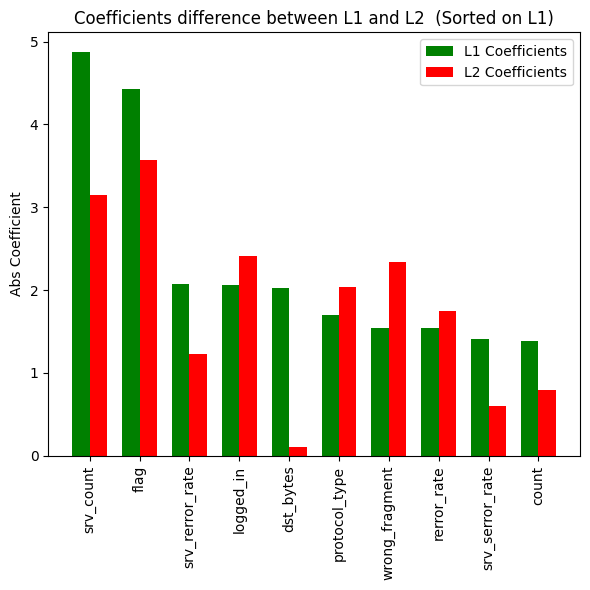

**This is sorted on L1 and only shows the top 25% most important features according to the model



In [33]:
import numpy as np
import matplotlib.pyplot as plt


sorted_indices = np.argsort(np.abs(coefficients_l1))[::-1]

n = len(feature_names) // 4  # Show only the 25% of features

sorted_feature_names = [feature_names[i] for i in sorted_indices[:n]]
sorted_coefficients_l1 = coef_df1['Abs_Coefficient'][sorted_indices[:n]]
sorted_coefficients_l2 = coef_df2['Abs_Coefficient'][sorted_indices[:n]]

indices = np.arange(n)
width = 0.35

plt.figure(figsize=(6, 6))
plt.bar(indices - width/2, sorted_coefficients_l1, width=width, label='L1 Coefficients', color='green')
plt.bar(indices + width/2, sorted_coefficients_l2, width=width, label='L2 Coefficients', color='red')

plt.xticks(indices, sorted_feature_names, rotation='vertical')
plt.ylabel('Abs Coefficient')
plt.title('Coefficients difference between L1 and L2  (Sorted on L1)')
plt.legend()
plt.tight_layout()
plt.show()

print("**This is sorted on L1 and only shows the top 25% most important features according to the model\n")


In [34]:
C_levels = [0.001, 0.01, 0.1, 1, 10, 100]

train_accuracy_lvls = []
test_accuracy_lvls = []

for C in C_levels:
    ml_algo = LogisticRegression(C=C, penalty='l2', solver='lbfgs')
    
    ml_algo.fit(X_train_std, y_train)
    
    train_accuracy = accuracy_score(y_train, ml_algo.predict(X_train_std))
    train_accuracy_lvls.append(train_accuracy)
    
    test_accuracy = accuracy_score(y_test, ml_algo.predict(X_test_std))
    test_accuracy_lvls.append(test_accuracy)
    
    print(f"\nC level={C}")
    print(f"Accuracy on the training data: {train_accuracy:.4f} -- Accuracy on the testing data: {test_accuracy:.4f}")


C level=0.001
Accuracy on the training data: 0.9978 -- Accuracy on the testing data: 0.9975

C level=0.01
Accuracy on the training data: 0.9988 -- Accuracy on the testing data: 0.9987

C level=0.1
Accuracy on the training data: 0.9991 -- Accuracy on the testing data: 0.9990

C level=1
Accuracy on the training data: 0.9991 -- Accuracy on the testing data: 0.9990

C level=10
Accuracy on the training data: 0.9991 -- Accuracy on the testing data: 0.9990

C level=100
Accuracy on the training data: 0.9990 -- Accuracy on the testing data: 0.9989


Again, due to the significant imbalance in the dataset, the accuracy remains fairly stable across different values of C. If we take a closer look, we can see a slight improvement in accuracy as C increases from 0.001 to 0.1. After that, the accuracy levels off and even drops a tiny bit when C reaches 100, though the difference is minimal. Based on this, it seems that the optimal regularization strength is likely around C = 0.1.

In [35]:
display(HTML(f"<h1>WITH UNDERSAMPLING:</h1>"))

Now I will try to balance the classes and revisit the results

In [36]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = under.fit_resample(X_train_std, y_train)

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', max_iter=200)
lr.fit(X_train_under, y_train_under)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train_under), "IT IS NOW BALANCED!")
print('Labels counts in y_test:', np.bincount(y_test))

print(f"Converged in {lr.n_iter_[0]} iterations.")

Labels counts in y: [  4107 489914]
Labels counts in y_train: [3286 3286] IT IS NOW BALANCED!
Labels counts in y_test: [  821 97984]
Converged in 107 iterations.


Interestingly, after under-sampling to balance the dataset, the model now takes 107 iterations to converge, almost twice as many as before. This increase highlights how the initial convergence was quicker when 99% of the data belonged to one class. With the classes now balanced, the model faces a more complex optimization task, requiring more effort to find the optimal parameters that accurately classify both classes.

In [37]:
y_train_pred = lr.predict(X_train_under)

cm = confusion_matrix(y_train_under, y_train_pred)
display(HTML(f"<h2>How did the training go:</h2>"))
print('Confusion Matrix:')
print(cm,"\n")


report = classification_report(y_train_under, y_train_pred)
print('Classification Report:')
print(report)

y_test_pred = lr.predict(X_test_std)

cm = confusion_matrix(y_test, y_test_pred)
print()
display(HTML(f"<h2>How did the testing go:</h2>"))
print('Confusion Matrix:')
print(cm)

print()

report = classification_report(y_test, y_test_pred)
print('Classification Report:')
print(report)


Confusion Matrix:
[[3251   35]
 [  56 3230]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3286
           1       0.99      0.98      0.99      3286

    accuracy                           0.99      6572
   macro avg       0.99      0.99      0.99      6572
weighted avg       0.99      0.99      0.99      6572




Confusion Matrix:
[[  810    11]
 [ 1913 96071]]

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.99      0.46       821
           1       1.00      0.98      0.99     97984

    accuracy                           0.98     98805
   macro avg       0.65      0.98      0.72     98805
weighted avg       0.99      0.98      0.99     98805



After applying under-sampling, we notice that the model achieves stellar results on the training set, with accuracy improving over the previous imbalanced scenario. This suggests that the model fits the training data very well. However, the test results reveal that the precision and f1-score for probe attacks are drastically low. This likely indicates overfitting, where the model has become too specialized to the balanced training data and is not generalizing well to the unseen, imbalanced test data. Consequently, it fails to capture important patterns necessary for accurately identifying probe attacks in the broader dataset.

In [38]:
coefficients = lr.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names,'Coefficient': coefficients})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

top_features = coef_df_sorted.head(3)
print("Top 3 most influential features:")
print(top_features)

Top 3 most influential features:
                        Feature  Coefficient  Abs_Coefficient
35  dst_host_same_src_port_rate    -2.525702         2.525702
23                    srv_count     2.276596         2.276596
3                          flag    -2.077354         2.077354


Once again, we see flag and srv_count among the top features. However, the new standout is dst_host_same_src_port_rate, which makes sense given the rebalancing of the classes and the new focus on probe attacks. This feature is important because a high rate of connections from the same source port to the same destination host often signals probing activity.

In [39]:
lr_l1 = LogisticRegression(
    penalty='l1',
    C=1.0,
    solver='liblinear',
    random_state=1
)

lr_l2 = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    random_state=1
)

lr_l1.fit(X_train_under, y_train_under)
lr_l2.fit(X_train_under, y_train_under)

y_pred_l1 = lr_l1.predict(X_test_std)
print("L1 Regularization Classification Report:")
print(classification_report(y_test, y_pred_l1))

y_pred_l2 = lr_l2.predict(X_test_std)
print("L2 Regularization Classification Report:")
print(classification_report(y_test, y_pred_l2))

L1 Regularization Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.99      0.45       821
           1       1.00      0.98      0.99     97984

    accuracy                           0.98     98805
   macro avg       0.65      0.98      0.72     98805
weighted avg       0.99      0.98      0.99     98805

L2 Regularization Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.99      0.45       821
           1       1.00      0.98      0.99     97984

    accuracy                           0.98     98805
   macro avg       0.65      0.98      0.72     98805
weighted avg       0.99      0.98      0.99     98805



It seems that the performace is even worse now as the precision has fallen with regularization. However this is not necessarily unexpected as Regularization works by shrinking model coefficients toward zero, which can disproportionately impact features important for predicting the smaller probe class. Also by penalizing large coefficients, the model may become too simple to capture the necessary patterns for the minority class, leading to lower precision and F1-scores for class 0.

In [40]:
coefficients_l1 = lr_l1.coef_[0]
coef_df1 = pd.DataFrame({'Feature': feature_names,'Coefficient': coefficients_l1})

coef_df1['Abs_Coefficient'] = coef_df1['Coefficient'].abs()
coef_df1_sorted = coef_df1.sort_values(by='Abs_Coefficient', ascending=False)

top_features = coef_df1_sorted.head(3)
print("Top 3 most influential features USING L1:")
print(top_features, "\n")

coefficients_l2 = lr_l2.coef_[0]
coef_df2 = pd.DataFrame({'Feature': feature_names,'Coefficient': coefficients_l2})

coef_df2['Abs_Coefficient'] = coef_df2['Coefficient'].abs()
coef_df2_sorted = coef_df2.sort_values(by='Abs_Coefficient', ascending=False)

top_features = coef_df2_sorted.head(3)
print("Top 3 most influential features USING L2:")
print(top_features, "\n")

Top 3 most influential features USING L1:
                        Feature  Coefficient  Abs_Coefficient
35  dst_host_same_src_port_rate    -2.274294         2.274294
23                    srv_count     1.810362         1.810362
3                          flag    -1.770934         1.770934 

Top 3 most influential features USING L2:
                        Feature  Coefficient  Abs_Coefficient
35  dst_host_same_src_port_rate    -2.229301         2.229301
3                          flag    -1.757475         1.757475
23                    srv_count     1.667082         1.667082 



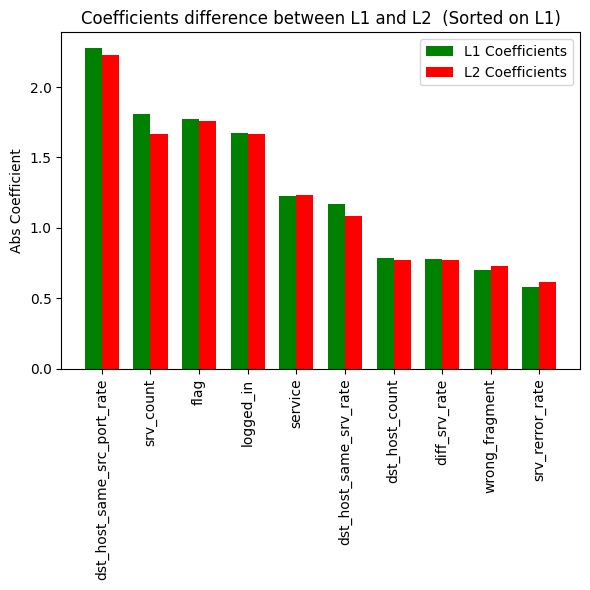

In [41]:
sorted_indices = np.argsort(np.abs(coefficients_l1))[::-1]

n = len(feature_names) // 4  # Show only the 25% of features

sorted_feature_names = [feature_names[i] for i in sorted_indices[:n]]
sorted_coefficients_l1 = coef_df1['Abs_Coefficient'][sorted_indices[:n]]
sorted_coefficients_l2 = coef_df2['Abs_Coefficient'][sorted_indices[:n]]

indices = np.arange(n)
width = 0.35

plt.figure(figsize=(6, 6))
plt.bar(indices - width/2, sorted_coefficients_l1, width=width, label='L1 Coefficients', color='green')
plt.bar(indices + width/2, sorted_coefficients_l2, width=width, label='L2 Coefficients', color='red')

plt.xticks(indices, sorted_feature_names, rotation='vertical')
plt.ylabel('Abs Coefficient')
plt.title('Coefficients difference between L1 and L2  (Sorted on L1)')
plt.legend()
plt.tight_layout()
plt.show()

In addition to what was mentioned earlier, the main point worth noting here is that the coefficient values for both L1 and L2 are now much more aligned. With the classes balanced and regularized, both models are focusing on the same key features.

In [42]:
C_levels = [0.001, 0.01, 0.1, 1, 10, 100]

train_accuracy_lvls = []
test_accuracy_lvls = []

for C in C_levels:
    ml_algo = LogisticRegression(C=C, penalty='l2', solver='lbfgs', max_iter= 200)
    
    ml_algo.fit(X_train_under, y_train_under)
    
    train_accuracy = accuracy_score(y_train_under, ml_algo.predict(X_train_under))
    train_accuracy_lvls.append(train_accuracy)
    
    test_accuracy = accuracy_score(y_test, ml_algo.predict(X_test_std))
    test_accuracy_lvls.append(test_accuracy)
    
    print(f"\nC level={C}")
    print(f"Accuracy on the training data: {train_accuracy:.4f} -- Accuracy on the testing data: {test_accuracy:.4f}")


C level=0.001
Accuracy on the training data: 0.9714 -- Accuracy on the testing data: 0.9775

C level=0.01
Accuracy on the training data: 0.9799 -- Accuracy on the testing data: 0.9791

C level=0.1
Accuracy on the training data: 0.9852 -- Accuracy on the testing data: 0.9802

C level=1
Accuracy on the training data: 0.9860 -- Accuracy on the testing data: 0.9801

C level=10
Accuracy on the training data: 0.9863 -- Accuracy on the testing data: 0.9805

C level=100
Accuracy on the training data: 0.9862 -- Accuracy on the testing data: 0.9805


It seems now that the plateau is higher than before undersampling. As the C value increases in the logistic regression model, we see improvements in accuracy up to C=10. Beyond this point, the accuracy levels off for both training and testing data. This plateau indicates that we've reached an optimal balance. Further increasing C doesn't enhance the model's performance.